# Data understanding

De gebruikte dataset is “Vestigingen_Gemeente" (https://opendata.cbs.nl/statline/#/CBS/nl/dataset/81575NED/table?ts=1584707583585). 

De CBS data is een csv bestand, dit staat voor comma seperated values of door comma gescheide waarden in het nederlands.
De data bevat de volgende kolomen:
 - `ID` is de unieke waarde voor elke row.
 - `Bedrijfstakken/branches SBI 2008` geeft de waarde weer in welke bedrijfstak/branch de bedrijfen zit.
 - `Perioden` geeft de periode aan waarin de bedrijfstak/branch actief in is.
 - `Regio's` is de regio waarin de behorende bedrijfstak/branch actief in is.
 - `Vestigingen (aantal)` is de aantal vestigingen die binnen die bedrijfstak/branch geteld zijn per regio en per periode.

## Beschrijven van de data

Hieronder staat een beschrijving van de data vanuit de Centraal Bureau Statistieken. Dit wordt telkens door middel van een stukje code weergegeven. 

In [34]:
import pandas as pd
import geopandas as gpd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# Dataset inlezen
file = "../../raw-data/Vestigingen_Gemeente.csv"
data_vg = pd.read_csv(file, sep=";")

# Dataverkennen door dataframe te openen
data_vg

,Bedrijfstakken/branches SBI 2008,Perioden,Regio's,Vestigingen (aantal)
0,"A Landbouw, bosbouw en visserij",2015,Aa en Hunze,280.0
1,"A Landbouw, bosbouw en visserij",2016,Aa en Hunze,290.0
2,"A Landbouw, bosbouw en visserij",2017,Aa en Hunze,285.0
3,"A Landbouw, bosbouw en visserij",2018,Aa en Hunze,290.0
4,"A Landbouw, bosbouw en visserij",2019*,Aa en Hunze,290.0
...,...,...,...,...
48751,U Extraterritoriale organisaties,2016,Gemeenten; niet in te delen,NaN
48752,U Extraterritoriale organisaties,2017,Gemeenten; niet in te delen,NaN
48753,U Extraterritoriale organisaties,2018,Gemeenten; niet in te delen,NaN
48754,U Extraterritoriale organisaties,2019*,Gemeenten; niet in te delen,NaN


In [36]:
# Info over de kolommen
info_kolommen_vg = data_vg.info()
info_kolommen_vg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48756 entries, 0 to 48755
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bedrijfstakken/branches SBI 2008  48756 non-null  object 
 1   Perioden                          48756 non-null  object 
 2   Regio's                           48756 non-null  object 
 3   Vestigingen (aantal)              38437 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [38]:
# Beschrijvende statistieken van de data
beschrijvende_stats_vg = data_vg.describe()
beschrijvende_stats_vg

,Vestigingen (aantal)
count,38437.000000
mean,242.814476
std,775.543593
min,0.000000
25%,20.000000
50%,95.000000
75%,250.000000
max,40725.000000


In [40]:
# Informatie over de kolomnamen in de Dataframe
data_vg.columns

Index(['Bedrijfstakken/branches SBI 2008', 'Perioden', 'Regio's',
       'Vestigingen (aantal)'],
      dtype='object')

In [41]:
# Controleren op nulwaarden in de dataframe
data_vg.isna().sum()

Bedrijfstakken/branches SBI 2008        0
Perioden                                0
Regio's                                 0
Vestigingen (aantal)                10319
dtype: int64

## Data exploratie

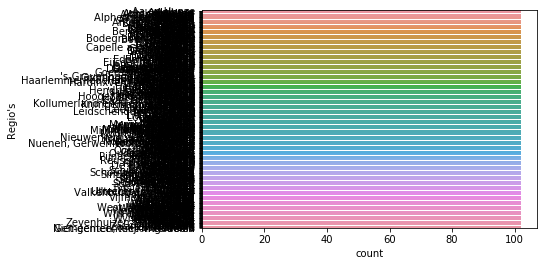

In [42]:
# Het laten zien van hoevaak een regio voorkomt in de dataset.
sb.countplot(y="Regio's", data=data_vg)

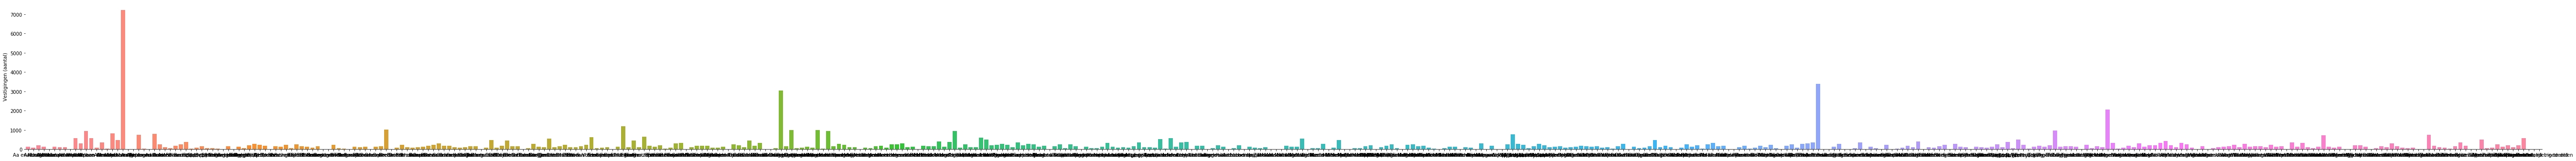

In [43]:
g = sb.catplot(x="Regio's", y="Vestigingen (aantal)",
                data=data_vg, saturation=10,
                kind="bar", ci=None, aspect=15)
(g.set_axis_labels("", "Vestigingen (aantal)")
  .set_titles("{col_name} {col_var}")
  .despine(left=True))

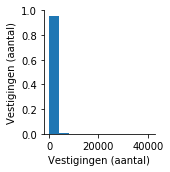

In [44]:
sb.pairplot(data_vg, kind="reg")

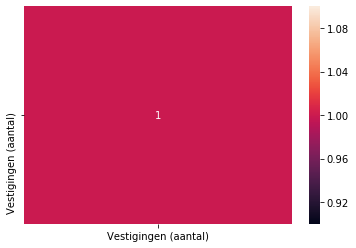

In [45]:
sb.heatmap(data_vg.corr(), annot=True)

### Samenvatting

Er is nu 1 dataset:
- `data_vg` is de 'standaard' dataframe met alle kolommen en waardes die compleet zijn.